#Here i am performing Spam detection using Naive Bayes Classifier 
##Our objective is to predict whether a message will be spam or not  

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [48]:
message=pd.read_csv('/content/drive/MyDrive/Spam detection.-Naive Bayes Classifier / spam.csv',encoding='latin-1')[['v1','v2']]

In [49]:
message.columns=['label','message']

In [50]:
message.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:

message.shape

(5572, 2)

In [52]:
message['length']=message['message'].apply(len)
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


#here we have two columns label and message label is our y and message will be convert into the x1,x2......xn

In [53]:
message['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [54]:
message.groupby('label').describe()

length                                                         
        count        mean        std   min    25%    50%    75%    max
label                                                                 
ham    4825.0   71.023627  58.016023   2.0   33.0   52.0   92.0  910.0
spam    747.0  138.866131  29.183082  13.0  132.5  149.0  157.0  224.0

In [55]:
message.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [56]:
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

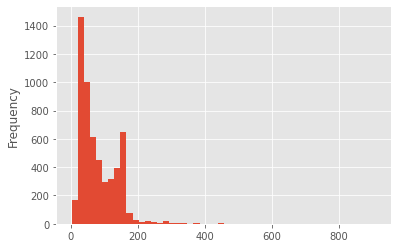

In [57]:
message['length'].plot(bins=50,kind='hist')

In [58]:
message.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

**Text Pre-Processing**

We are going to take the message and sepreate each of the word from the message in kind of numerical feature vactor.So we are using here Bag-of_words approch , where each unique word is represent by the one number.
* So our first step will be split the message into individual words.
* Second Step : remove common words like 'the','a','an' using NLTK library 






In [59]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [60]:
import string  
from nltk.corpus import stopwords

In [61]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

#Let's write a function which removes punctuation and stopwords from our data

In [62]:
#this is the list of the punctutaion words 
[punc for punc in string.punctuation]

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [63]:
def text_process(msg):
  nonpunc=[char for char in msg if char not in string.punctuation]
  nonpunc="".join(nonpunc)
  return ' '.join([word for word in nonpunc.split() if word.lower() not in stopwords.words('english')])

Now let's "tokenize" these message tokenization is just the term used to describe the process of converting the normal text 
strings in to a list of tokens(words we actually want)

In [64]:
message['tokenized_message']=message['message'].apply(text_process)
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


In [65]:
#message['lenght_tokenized']=message['tokenized_message'].apply(len)

In [66]:
message.head()

,label,message,length,tokenized_message
0,ham,"Go until jurong point, crazy.. Available only ...",111,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,U dun say early hor U c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,Nah dont think goes usf lives around though


**Vectorization**

Now we have tokenized message so will convert it into vectors so that ** Scikit ** learn algo models can work with.
* We will do three steps using the bag-of-words 


1.   Word freq in each message
2.   Weigh the counts, so that frequent tokens get lower weigh
3.   Normalize the vactor to unit length, to abstract from the original text lenght (L2 norm)



In [67]:
from sklearn.feature_extraction.text import CountVectorizer

In [68]:
#max_df= is basically a propotion which lets max_df=0.9 which means drop the token where the word is appearing 90% in the database 
#min_df=10 it means if the appear less thean 10 doc than leave it otherwise take it   
Vectorizer=CountVectorizer(max_df=0.9,min_df=10)
X=Vectorizer.fit_transform(message['tokenized_message'])

In [69]:
X

<5572x872 sparse matrix of type '<class 'numpy.int64'>'
	with 30629 stored elements in Compressed Sparse Row format>

In [70]:
X.toarray()[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [71]:
#printing the name of the features which are tokanized 
print(Vectorizer.get_feature_names())

['0800', '08000839402', '08000930705', '10', '100', '1000', '10p', '12', '12hrs', '150', '150p', '150pm', '150pmsg', '150ppm', '16', '18', '1st', '200', '2000', '2003', '250', '2nd', '300', '350', '500', '5000', '750', '800', '8007', '86688', '87066', 'abiola', 'able', 'abt', 'account', 'across', 'actually', 'address', 'admirer', 'aft', 'afternoon', 'age', 'ago', 'ah', 'aight', 'almost', 'alone', 'already', 'alright', 'also', 'always', 'amp', 'angry', 'another', 'ans', 'answer', 'anyone', 'anything', 'anytime', 'anyway', 'apply', 'ard', 'area', 'around', 'asap', 'ask', 'askd', 'asked', 'asking', 'ass', 'attempt', 'auction', 'available', 'await', 'award', 'awarded', 'away', 'awesome', 'b4', 'babe', 'baby', 'back', 'bad', 'bank', 'bath', 'bathe', 'bcoz', 'bday', 'beautiful', 'bed', 'believe', 'best', 'better', 'big', 'birthday', 'bit', 'bonus', 'book', 'booked', 'bored', 'bout', 'box', 'boy', 'boytoy', 'break', 'bring', 'brother', 'bslvyl', 'bt', 'bus', 'busy', 'buy', 'call', 'called', '

In [72]:
X.toarray().shape

(5572, 872)

In [73]:
import sys
import numpy 
numpy.set_printoptions(threshold=sys.maxsize)

In [74]:
message.iloc[4000]['tokenized_message']

'Hes gonna worry nothing wont give money use'

In [75]:
sum(X.toarray()[4000])

8

** Training Model ** 

In [76]:
#as usual i will perform train and test split 
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test=train_test_split(message['tokenized_message'],message['label'],test_size=0.2)

In [77]:
msg_train.head()

4765                                     Whens radio show
3544                                    Thank meet monday
5061    Havent stuck orchard dads car Going 4 dinner U...
3336                                       GAS STATION GO
3780    Dear friends sorry late information Today birt...
Name: tokenized_message, dtype: object

now we use naive bayes classifier to perform this classification task

In [78]:
train_vectorized=Vectorizer.transform(msg_train)
test_vectorized=Vectorizer.transform(msg_test)

In [79]:
train_vectorized

<4457x872 sparse matrix of type '<class 'numpy.int64'>'
	with 24581 stored elements in Compressed Sparse Row format>

In [80]:
train_array=train_vectorized.toarray()
test_array=test_vectorized.toarray()

In [81]:
from sklearn.naive_bayes import GaussianNB
spam_detect_model=GaussianNB().fit(train_array,label_train)

In [82]:
train_preds=spam_detect_model.predict(train_array)
test_preds=spam_detect_model.predict(test_array)

In [83]:
from sklearn.metrics import classification_report,confusion_matrix

In [84]:
#confusio matrics for trian and test 
print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[2871 1001]
 [   0  585]]
[[719 234]
 [ 11 151]]


In [85]:
print("for test ")
print("\n")
print(classification_report(label_test,test_preds))
print("for trian\n")

print(classification_report(label_train,train_preds))

for test 


              precision    recall  f1-score   support

         ham       0.98      0.75      0.85       953
        spam       0.39      0.93      0.55       162

    accuracy                           0.78      1115
   macro avg       0.69      0.84      0.70      1115
weighted avg       0.90      0.78      0.81      1115

for trian

              precision    recall  f1-score   support

         ham       1.00      0.74      0.85      3872
        spam       0.37      1.00      0.54       585

    accuracy                           0.78      4457
   macro avg       0.68      0.87      0.70      4457
weighted avg       0.92      0.78      0.81      4457

